In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [62]:
df8=pd.read_csv("all_alpha_08.csv")
df18=pd.read_csv("all_alpha_18.csv")

In [63]:
df8.shape

(2404, 18)

In [64]:
df18.shape

(1611, 18)

In [65]:
df8.head(4)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no


In [66]:
df18.head(15)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330
5,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330
6,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5LH3,small car,3,20,32,24,5,No,368
7,ACURA TLX,3.5,6.0,SemiAuto-9,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.5LH3,small car,3,20,32,24,5,No,368
8,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.5LH3,small car,3,21,30,24,5,No,369
9,ACURA TLX,3.5,6.0,SemiAuto-9,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV03.5LH3,small car,3,21,30,24,5,No,369


In [67]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [68]:
df8.describe()

,Displ,Unadj Cmb MPG
count,2404.000000,2205.000000
mean,3.748918,23.916104
std,1.335785,6.366170
min,1.300000,10.018400
25%,2.500000,19.113900
50%,3.500000,23.921300
75%,4.800000,27.869300
max,8.400000,65.777800


In [69]:
df8.shape

(2404, 18)

In [70]:
df8.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [71]:
df8=df8.dropna()
df8.shape

(2205, 18)

In [72]:
df18=df18.dropna()
df18.shape

(1609, 18)

In [73]:
##fixing cyl datatype

In [74]:
df8['Cyl'].str.extract('(\d+)').astype(int)

df18['Cyl'] = df18['Cyl'].astype(int)


In [75]:
index1=df8[df8['Cmb MPG'].str.contains('/')].index
index2=df18[df18['Cmb MPG'].str.contains('/')].index

In [76]:
for i in index1:
    df8=df8.drop(i)

In [77]:
for i in index2:
    df18=df18.drop(i)

In [78]:
df8['City MPG']=df8['City MPG'].astype(float)
df8['Hwy MPG']=df8['Hwy MPG'].astype(float)
df8['Cmb MPG']=df8['Cmb MPG'].astype(float)
df8['Greenhouse Gas Score']=df8['Greenhouse Gas Score'].astype(int)

In [79]:
df18['City MPG']=df18['City MPG'].astype(float)
df18['Hwy MPG']=df18['Hwy MPG'].astype(float)
df18['Cmb MPG']=df18['Cmb MPG'].astype(float)


In [80]:
##checking the data type of all columns

In [81]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2139 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2139 non-null   object 
 1   Displ                 2139 non-null   float64
 2   Cyl                   2139 non-null   object 
 3   Trans                 2139 non-null   object 
 4   Drive                 2139 non-null   object 
 5   Fuel                  2139 non-null   object 
 6   Sales Area            2139 non-null   object 
 7   Stnd                  2139 non-null   object 
 8   Underhood ID          2139 non-null   object 
 9   Veh Class             2139 non-null   object 
 10  Air Pollution Score   2139 non-null   object 
 11  FE Calc Appr          2139 non-null   object 
 12  City MPG              2139 non-null   float64
 13  Hwy MPG               2139 non-null   float64
 14  Cmb MPG               2139 non-null   float64
 15  Unadj Cmb MPG        

In [82]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 0 to 1608
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1530 non-null   object 
 1   Displ                 1530 non-null   float64
 2   Cyl                   1530 non-null   int32  
 3   Trans                 1530 non-null   object 
 4   Drive                 1530 non-null   object 
 5   Fuel                  1530 non-null   object 
 6   Cert Region           1530 non-null   object 
 7   Stnd                  1530 non-null   object 
 8   Stnd Description      1530 non-null   object 
 9   Underhood ID          1530 non-null   object 
 10  Veh Class             1530 non-null   object 
 11  Air Pollution Score   1530 non-null   int64  
 12  City MPG              1530 non-null   float64
 13  Hwy MPG               1530 non-null   float64
 14  Cmb MPG               1530 non-null   float64
 15  Greenhouse Gas Score 

QUESTION 1

In [83]:
df8['Fuel'].value_counts()

Gasoline    2129
diesel         7
CNG            2
ethanol        1
Name: Fuel, dtype: int64

In [84]:
df18['Fuel'].value_counts()

Gasoline    1492
Diesel        38
Name: Fuel, dtype: int64

In [85]:
##Looks like the alternative sources of fuel available in 2008 are CNG and ethanol, and those in 2018 ethanol and electricity.

2
0


Text(0, 0.5, 'Number of Unique Models')

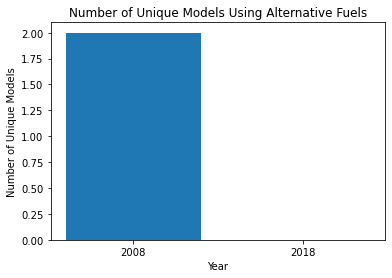

In [86]:
year_08 = df8.query('Fuel in ["CNG", "ethanol"]')['Model'].nunique()##unique models used alternative source of fuel in 2008
print(year_08)
year_18 = df18.query('Fuel in ["Ethanol", "Electricity"]').Model.nunique()##unique models used alternative source of fuel in 2018
print(year_18)
##getting the visuals of the data
plt.bar(["2008", "2018"], [year_08,year_18])
plt.title("Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")


QUESTION 2:

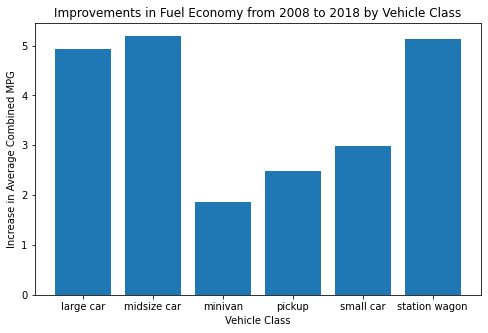

In [87]:
year_08=df8.groupby("Veh Class")["Cmb MPG"].mean()##getting the average of vehicle class in 2008
year_18=df18.groupby("Veh Class")["Cmb MPG"].mean()##getting the average of vehicle class in 2018

a = year_18 - year_08##subtracting the average
a.dropna(inplace=True)
##plotting the data
plt.subplots(figsize=(8, 5))
plt.bar(a.index,a)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');


QUESTION 3:

In [88]:
df8['SmartWay'].unique()

array(['no', 'yes'], dtype=object)

In [89]:
df18['SmartWay'].unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [90]:
new_df=df8[df8['SmartWay']=='yes']
new_df.describe()

,Displ,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score
count,638.000000,638.000000,638.000000,638.000000,638.000000,638.000000
mean,2.497962,21.443574,28.871473,24.188088,30.384107,7.023511
std,0.582108,3.470772,3.078120,3.065335,5.369333,0.797019
min,1.300000,17.000000,22.000000,20.000000,19.653300,6.000000
25%,2.000000,20.000000,27.000000,22.000000,26.814675,6.000000
50%,2.400000,21.000000,29.000000,24.000000,29.946000,7.000000
75%,2.900000,22.000000,31.000000,25.000000,33.000900,7.000000
max,5.000000,48.000000,45.000000,46.000000,65.777800,10.000000


In [91]:
new_df=df18.query('SmartWay in ["Yes","Elite"]')
new_df.describe()

,Displ,Cyl,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,1.767052,3.942197,5.092486,29.994220,38.080925,33.080925,7.439306
std,0.439359,0.440810,1.732924,4.859057,3.762473,3.975848,0.772390
min,1.200000,3.000000,3.000000,26.000000,30.000000,30.000000,7.000000
25%,1.500000,4.000000,3.000000,28.000000,36.000000,31.000000,7.000000
50%,1.600000,4.000000,5.000000,28.000000,37.000000,32.000000,7.000000
75%,2.000000,4.000000,7.000000,30.000000,40.000000,34.000000,8.000000
max,3.500000,6.000000,7.000000,51.000000,53.000000,52.000000,10.000000


QUESTION 4:

In [92]:
##To find the features associated with better fuel economy, we consider the records which are greater than the mean of the 'Cmb MPG' field.

In [93]:
new_df= df8[df8['Cmb MPG'] > df8['Cmb MPG'].mean()]
new_df.describe()



,Displ,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.00000
mean,2.668313,20.240447,27.533085,22.907735,28.744766,6.61137
std,0.670669,3.147488,3.056232,2.901020,4.919554,0.80515
min,1.300000,17.000000,20.000000,20.000000,19.534800,4.00000
25%,2.300000,18.000000,25.000000,21.000000,25.941400,6.00000
50%,2.500000,20.000000,27.000000,22.000000,28.060200,6.00000
75%,3.000000,21.000000,29.000000,24.000000,30.810500,7.00000
max,6.000000,48.000000,45.000000,46.000000,65.777800,10.00000


In [94]:
new_df= df18[df18['Cmb MPG'] > df18['Cmb MPG'].mean()]
new_df.describe()



,Displ,Cyl,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,2.071008,4.182073,4.641457,24.843137,33.089636,27.938375,5.911765
std,0.495095,0.688852,1.845434,4.135576,4.085390,3.927693,1.053573
min,1.200000,3.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,1.800000,4.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2.000000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2.000000,4.000000,7.000000,27.000000,35.000000,30.000000,7.000000
max,3.600000,6.000000,7.000000,51.000000,53.000000,52.000000,10.000000


QUESTION 5:

In [95]:
df8.rename(columns=lambda x: x + "_2008", inplace=True)##renaming the column name by adding 2008 to each column name


In [96]:
df8.head(4)

,Model_2008,Displ_2008,Cyl_2008,Trans_2008,Drive_2008,Fuel_2008,Sales Area_2008,Stnd_2008,Underhood ID_2008,Veh Class_2008,Air Pollution Score_2008,FE Calc Appr_2008,City MPG_2008,Hwy MPG_2008,Cmb MPG_2008,Unadj Cmb MPG_2008,Greenhouse Gas Score_2008,SmartWay_2008
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15.0,20.0,17.0,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15.0,20.0,17.0,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17.0,22.0,19.0,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17.0,22.0,19.0,24.1745,5,no


In [97]:
df_combined = df8.merge(df18, left_on='Model_2008', right_on='Model', how='inner')##merging the two dataset
df_combined.to_csv('combined_dataset.csv', index=False)


In [98]:
comb_df = pd.read_csv('combined_dataset.csv')
comb_df.shape 

model_mpg_08 = comb_df.groupby('Model')['Cmb MPG_2008'].mean();##average of 2008 cmp mpg 
model_mpg_18 = comb_df.groupby('Model')['Cmb MPG'].mean(); ##average of 2018 cmp mpg

mpg_change = model_mpg_18 - model_mpg_08
mpg_change.describe()


count    76.000000
mean      3.607228
std       2.348942
min      -1.000000
25%       2.255357
50%       3.125000
75%       4.734984
max      10.666667
dtype: float64